# 02 Monitor the training progress

## Questions
- How do I create a neural network for a regression task?
- How does optimization work?
- How do I monitor the training process?
- How do I detect (and avoid) overfitting?
- What are common options to improve the model performance?


## 1. Formulate / Outline the problem: weather prediction
Predict the number of sunshine hours of the next day in BASEL

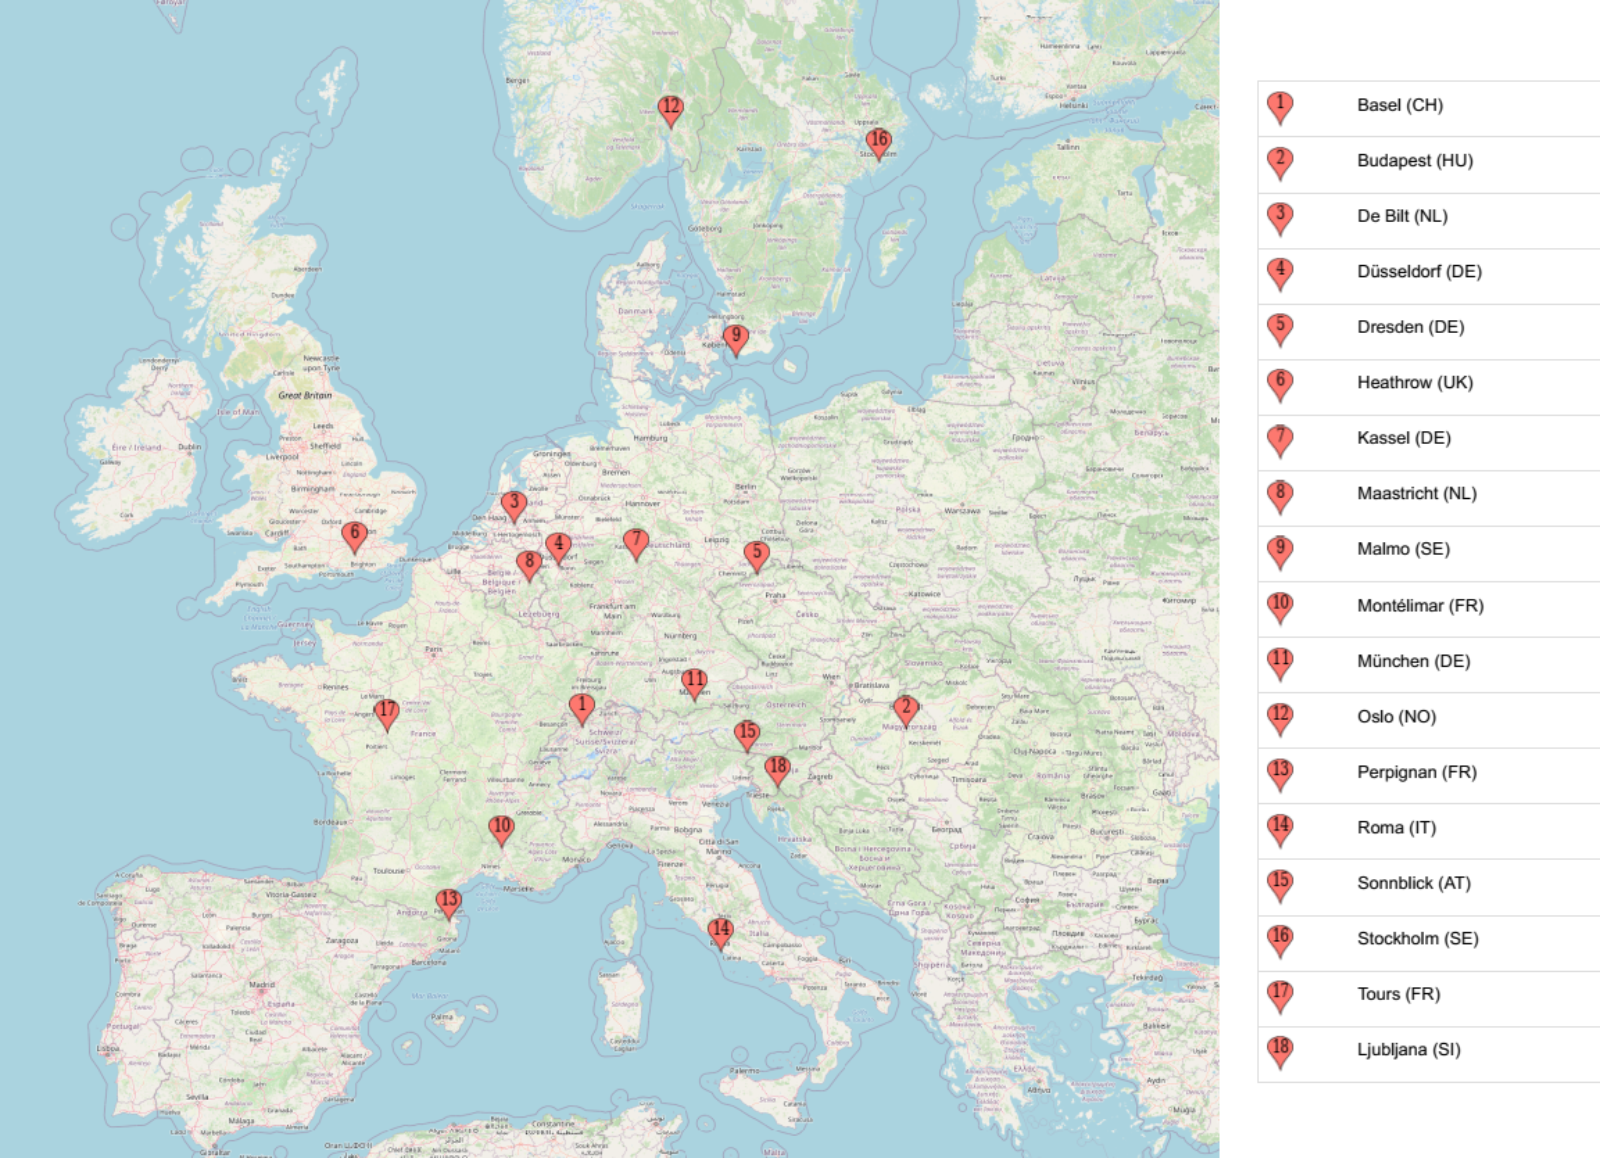

## 2. Identify inputs and outputs
- input: features describing the weather in different european cities for a given day
- output: number of sunshine hours in Basel the next day

In [1]:
import pandas as pd

In [3]:
data = pd.read_csv("https://zenodo.org/record/5071376/files/weather_prediction_dataset_light.csv?download=1")

In [2]:
filename = "data/weather_prediction_dataset_light.csv"
data = pd.read_csv(filename)

FileNotFoundError: [Errno 2] No such file or directory: 'data/weather_prediction_dataset_light.csv'

In [4]:
data.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,SONNBLICK_temp_mean,SONNBLICK_temp_min,SONNBLICK_temp_max,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-15.2,-17.0,-13.4,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,-13.7,-15.0,-12.3,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-9.2,-12.5,-5.8,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,-5.6,-7.0,-4.2,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-7.6,-9.4,-5.8,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [5]:
data.shape

(3654, 91)

## 3. Prepare data

In [6]:
nr_rows = 365*3 # 3 years

X_data = data.loc[:nr_rows]
X_data = X_data.drop(columns=['DATE', 'MONTH'])

In [7]:
y_data = data.loc[1:(nr_rows + 1)]["BASEL_sunshine"]

In [8]:
import sklearn

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X_data, y_data, 
                                                          test_size=0.3, random_state=0)

In [12]:
X_val, X_test, y_val, y_test = train_test_split(X_holdout, 
                                                y_holdout, 
                                                test_size=0.5, 
                                                random_state=0)

In [14]:
X_train.shape, X_test.shape, X_val.shape

((767, 89), (165, 89), (164, 89))

## 4. Choose a pretrained model or start building architecture from scratch
**breaktime until 14:35**

## Exercise: Architecture of the network (line 484 (confirmed))
As we want to design a neural network architecture for a regression task,
see if you can first come up with the answers to the following questions:

1. What must be the dimension of our input layer?
2. We want to output the prediction of a single number. The output layer of the NN hence cannot be the same as for the classification task earlier. This is because the `softmax` activation being used had a concrete meaning with respect to the class labels which is not needed here. What output layer design would you choose for regression?
Hint: A layer with `relu` activation, with `sigmoid` activation or no activation at all?
3. (Optional) How would we change the model if we would like to output a prediction of the precipitation in Basel in *addition* to the sunshine hours?

In [15]:
from tensorflow import keras

In [23]:
def create_nn(input_shape, name="weather_prediction_model"):
    inputs = keras.Input(shape=input_shape, name='input')
    
    layers_dense = keras.layers.Dense(100, 'relu')(inputs)
    layers_dense = keras.layers.Dense(50, 'relu')(layers_dense)
    
    outputs = keras.layers.Dense(1)(layers_dense)
    
    model = keras.Model(inputs=inputs, outputs=outputs, 
                        name=name)
    return model


In [24]:
model = create_nn(input_shape=(X_data.shape[1],), name="first_attempt")

In [25]:
model.summary()

Model: "first_attempt"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 89)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │         9,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,101 (55.08 KB)

 Trainable params: 14,101 (55.08 KB)

 Non-trainable params: 0 (0.00 B)

## Intermezzo: How do neural networks learn?

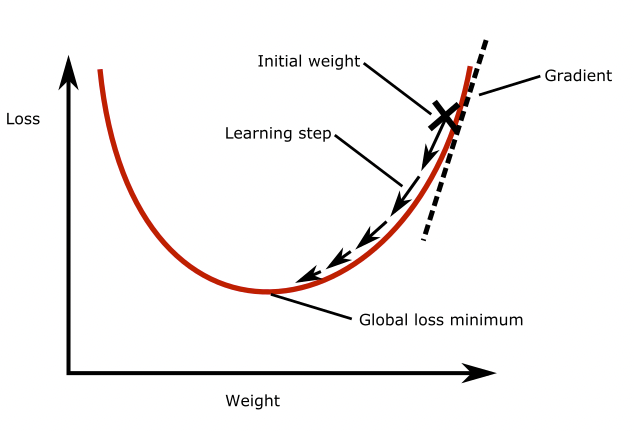

## Exercise: gradient descent (line 510)
Answer the following questions:
1. What is the goal of optimization?

    A. To find the weights that maximize the loss function
    B. To find the weights that minimize the loss function

2. What happens in one gradient descent step?

    A. The weights are adjusted so that we move in the direction of the gradient, so up the slope of the loss function
    B. The weights are adjusted so that we move in the direction of the gradient, so down the slope of the loss function
    C. The weights are adjusted so that we move in the direction of the negative gradient, so up the slope of the loss function
    D. The weights are adjusted so that we move in the direction of the negative gradient, so down the slope of the loss function

3. When the batch size is increased: (multiple answers might apply)

    A. The number of samples in an epoch also increases
    B. The number of batches in an epoch goes down
    C. The training progress is more jumpy, because more samples are consulted in each update step (one batch).
    D. The memory load (memory as in computer hardware) of the training process is increased

4. If you are done: have a look at the different losses in: https://keras.io/api/losses/

# Glossary:
- Sample = 1 observation = 1 row in a 2D dataframe
- Batch = a set of observations that you feed to the model in a learning step
- Epoch = one iteration of going through the data
- Feature = one variable in the input data = input
- Learning step = one iteration of learning (using gradient descent) = 1. we make predictions on one batch of data (let's say 32 samples) 2. Calculate the loss 3. We adjust the weights according to the loss (gradient descent)
- Learning rate = controls the magnitude of weight adjustment in gradient descent



## 5. Choose a loss function and optimizer

In [28]:
def compile_model(model):
    model.compile(loss='mse', optimizer='adam',
              metrics=[keras.metrics.RootMeanSquaredError()])

In [30]:
compile_model(model)

## 6. Train the model

In [31]:
history = model.fit(X_train, y_train, 
                    batch_size=32,
                    epochs=200,
                    verbose=2)

Epoch 1/200
24/24 - 0s - 15ms/step - loss: 14.9716 - root_mean_squared_error: 3.8693
Epoch 2/200
24/24 - 0s - 1ms/step - loss: 12.3188 - root_mean_squared_error: 3.5098
Epoch 3/200
24/24 - 0s - 1ms/step - loss: 12.4527 - root_mean_squared_error: 3.5288
Epoch 4/200
24/24 - 0s - 1ms/step - loss: 11.1658 - root_mean_squared_error: 3.3415
Epoch 5/200
24/24 - 0s - 1ms/step - loss: 11.1381 - root_mean_squared_error: 3.3374
Epoch 6/200
24/24 - 0s - 1ms/step - loss: 10.4914 - root_mean_squared_error: 3.2390
Epoch 7/200
24/24 - 0s - 1ms/step - loss: 10.6521 - root_mean_squared_error: 3.2638
Epoch 8/200
24/24 - 0s - 1ms/step - loss: 10.3449 - root_mean_squared_error: 3.2163
Epoch 9/200
24/24 - 0s - 1ms/step - loss: 9.8917 - root_mean_squared_error: 3.1451
Epoch 10/200
24/24 - 0s - 1ms/step - loss: 10.5045 - root_mean_squared_error: 3.2411
Epoch 11/200
24/24 - 0s - 1ms/step - loss: 9.8451 - root_mean_squared_error: 3.1377
Epoch 12/200
24/24 - 0s - 1ms/step - loss: 9.7465 - root_mean_squared_error

In [32]:
history_df = pd.DataFrame.from_dict(history.history)

Text(0.5, 0, 'epochs')

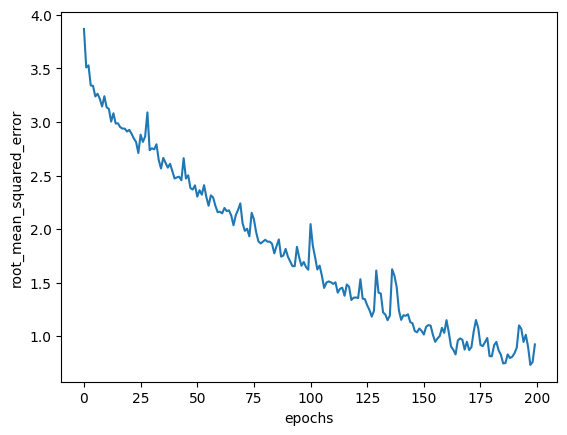

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=history_df['root_mean_squared_error'])
plt.xlabel('epochs')

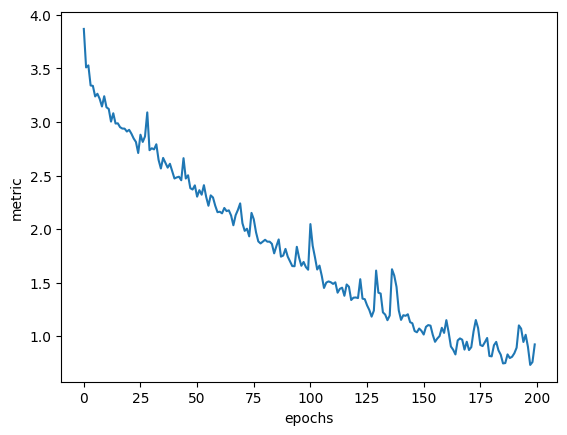

In [39]:
def plot_history(history, metrics):
    history_df = pd.DataFrame.from_dict(history.history)
    sns.lineplot(data=history_df[metrics])
    plt.xlabel('epochs')
    plt.ylabel('metric')

plot_history(history, metrics='root_mean_squared_error')

## 7. Perform a prediction/classification

In [40]:
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


## 8. Measure performance

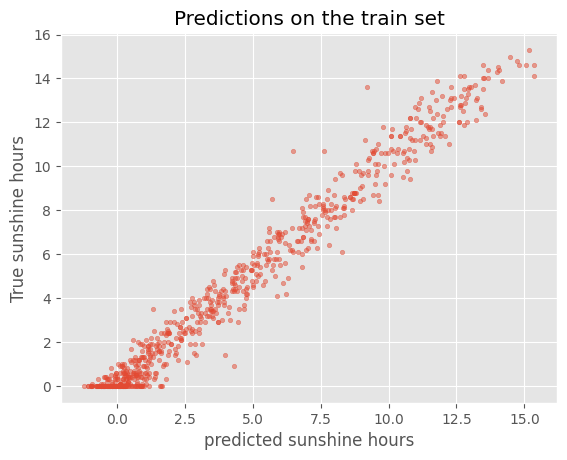

In [41]:
def plot_predictions(y_pred, y_true, title):
    plt.style.use("ggplot")
    plt.scatter(y_pred, y_true, s=10, alpha=0.5)
    plt.xlabel('predicted sunshine hours')
    plt.ylabel('True sunshine hours')
    plt.title(title)

plot_predictions(y_train_predicted, y_train, title='Predictions on the train set')

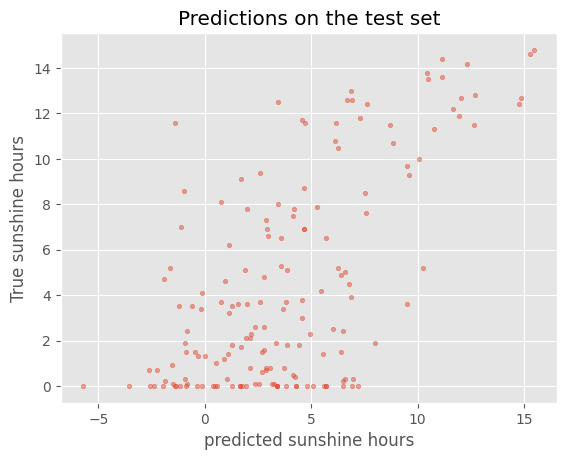

In [42]:
plot_predictions(y_test_predicted, y_test, title="Predictions on the test set")

## Exercise: reflecting on our results (line 550)
* Is the performance of the model as you expected (or better/worse)?
* Is there a notable difference between training set and test set? And if so, why?


In [45]:
loss, rmse = model.evaluate(X_train, y_train)
loss, rmse

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step - loss: 0.5968 - root_mean_squared_error: 0.7711


(0.5498695373535156, 0.7415319085121155)

In [46]:
loss, rmse = model.evaluate(X_test, y_test)
loss, rmse

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.2059 - root_mean_squared_error: 3.7668 


(13.977638244628906, 3.7386679649353027)

In [48]:
y_baseline_prediction = X_test['BASEL_sunshine']

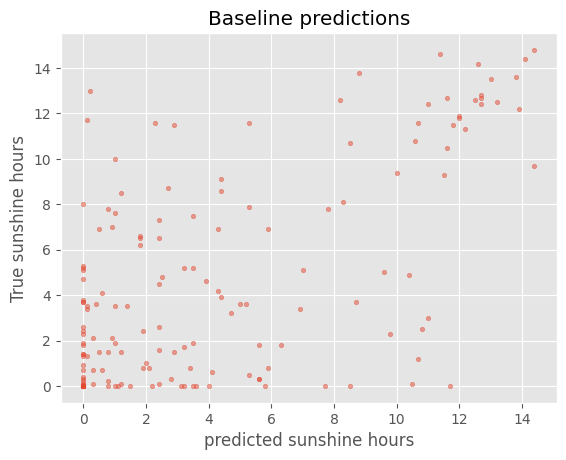

In [49]:
plot_predictions(y_baseline_prediction, y_test, title='Baseline predictions')

In [51]:
from sklearn.metrics import root_mean_squared_error
rmse_baseline = root_mean_squared_error(y_test, y_baseline_prediction)

In [52]:
rmse_baseline

3.877323350410224